# NAFLD detection using RNA-Seq data


__Content creators:__  Mahdi Anvari, Sadegh Rizi

**University of Tehran, Department of Biotechnology**

# Q3 - Python section

In [134]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [135]:
# Load Data
normal_counts = pd.read_csv('Normal.counts.voom.csv')
meta_data = pd.read_csv('meta_data.csv')

In [136]:
X_train, X_test, y_train, y_test = train_test_split(normal_counts.iloc[0:,1:].T, meta_data['Simplified_class'], test_size=0.3, random_state = 10101)

In [137]:
X_train.T.to_csv('train_normal_counts.csv', index=False)
y_train.T.to_csv('train_meta_data.csv', index=False)

In [5]:
# Run R script

## First Machine

In [13]:
subset_data1 = pd.read_csv('subset_data1.csv')

In [14]:
subset_data1.head()

,Unnamed: 0,DLDR_0036,DLDR_0081,DLDR_0191,DLDR_0188,DLDR_0130,DLDR_0013,DLDR_0079,DLDR_0131,DLDR_0135,...,DLDR_0175,DLDR_0052,DLDR_0087,DLDR_0155,DLDR_0092,DLDR_0187,DLDR_0186,DLDR_0179,DLDR_0182,DLDR_0001
0,10,4.589555,5.482169,5.013154,5.066071,4.655817,4.299078,4.752957,5.409514,4.993777,...,4.853565,4.567173,4.985158,5.234776,4.900754,4.923087,5.004500,5.058062,5.002454,4.221450
1,17,5.449846,5.626559,5.668470,5.824931,5.645748,5.172477,5.550495,5.445684,5.825299,...,5.574066,5.250757,6.008989,6.014251,5.971633,5.707487,5.784668,5.655138,5.919827,5.086468
2,39,7.962122,8.113546,8.351269,8.182106,8.310956,7.149491,7.950599,8.361148,8.216094,...,8.256723,7.875478,8.038917,8.041216,8.194375,8.353489,8.412962,8.349751,8.401472,7.200374
3,58,0.814408,-0.640228,0.199094,0.501286,0.527648,2.050562,0.828283,-0.890203,-0.338721,...,0.035942,-0.462067,0.019609,-0.410148,-0.396437,-0.626154,0.601446,1.338027,0.416094,2.125326
4,67,5.513839,6.027475,6.073207,5.862186,5.755947,4.997887,5.706940,5.780650,6.019866,...,5.756585,5.475180,5.981856,5.873197,5.862836,5.832565,5.770585,5.658351,6.017044,5.071807


In [15]:
subset_data1.shape

(500, 135)

In [16]:
meta_data1 = pd.read_csv('meta_data1.csv')

In [17]:
meta_data1.head()

,Unnamed: 0,Simplified_class
0,1,Normal
1,2,Fibrosis
2,3,Normal
3,4,Normal
4,5,Fibrosis


In [18]:
meta_data1.shape

(134, 2)

In [19]:
print(meta_data1['Simplified_class'].to_list().count("Normal"))
print(meta_data1['Simplified_class'].to_list().count("Fibrosis"))

44
90


In [20]:
selected_genes_R = subset_data1.T.iloc[0,:].to_list()

In [21]:
selected_genes_Python = [int(i-1) for i in selected_genes_R ]

In [22]:
selected_genes_Python[:10]

[9, 16, 38, 57, 66, 120, 170, 264, 277, 300]

In [23]:
len(selected_genes_Python)

500

In [25]:
df_deg = subset_data1.iloc[0:,1:].T
df_deg_test = X_test[selected_genes_Python]

In [26]:
df_deg.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
DLDR_0036,4.589555,5.449846,7.962122,0.814408,5.513839,6.281569,-0.879489,0.587637,5.529902,5.713408,...,3.496573,1.691260,-0.443390,4.240063,2.327669,6.925971,-2.645023,-2.645023,-4.966951,4.440316
DLDR_0081,5.482169,5.626559,8.113546,-0.640228,6.027475,6.464808,0.582165,-2.225190,5.846272,6.171415,...,2.984263,0.582165,-2.225190,4.542994,1.681701,7.323632,-2.225190,-2.225190,-2.225190,5.032198
DLDR_0191,5.013154,5.668470,8.351269,0.199094,6.073207,6.162367,-0.624028,-0.076540,5.553583,5.919896,...,2.333744,1.403453,-0.865036,4.322990,2.333744,7.411511,-2.739505,-4.324468,-4.324468,4.749674
DLDR_0188,5.066071,5.824931,8.182106,0.501286,5.862186,6.247241,0.632531,0.196432,5.359267,6.081949,...,2.518360,1.466521,-1.083676,4.253627,1.941859,7.189120,-2.306069,-3.891031,-1.083676,5.276387
DLDR_0130,4.655817,5.645748,8.310956,0.527648,5.755947,6.170724,-3.096843,0.272391,5.774549,5.670238,...,2.925525,1.046115,-0.594342,4.135178,0.932905,7.519400,-4.681805,-4.681805,-2.359877,5.094628


In [27]:
df_deg_test.head()

,9,16,38,57,66,120,170,264,277,300,...,16419,16600,16661,16754,16964,17074,17118,17186,17236,17347
DLDR_0022,3.967031,4.998491,7.316929,1.917858,5.013351,5.871714,1.048644,2.880522,5.101756,4.988498,...,3.883221,1.808510,2.594613,3.053445,2.954252,6.646771,0.885915,0.246091,1.389681,3.811348
DLDR_0016,4.603126,5.185253,7.409509,2.186388,5.176144,5.753854,0.365358,2.608214,5.079298,5.421363,...,3.416537,2.053414,2.566992,3.909678,2.538841,6.739625,1.349238,0.545930,1.792368,3.447152
DLDR_0004,4.003661,5.030589,7.521941,2.259709,4.919722,5.698622,1.595576,2.418699,5.125878,5.200742,...,3.697330,1.876989,2.231420,3.252689,3.120103,6.827647,1.406099,0.999473,2.016152,3.707635
DLDR_0165,5.286333,5.689689,8.155569,0.694707,5.901682,6.353598,-1.823142,0.332137,5.827910,5.834420,...,2.543975,1.021207,0.783516,4.419599,2.531208,7.434889,-3.697611,-3.697611,-1.195110,5.282529
DLDR_0127,5.118729,5.592257,8.007950,0.671576,5.464008,6.121529,-0.963140,0.897457,5.446251,5.955723,...,2.816839,0.621823,0.280786,3.841501,1.683750,7.391864,-0.687505,0.215197,0.215197,4.626561


In [41]:
y_train[y_train != 'Normal'] = 'Fibrosis'
y_test[y_test != 'Normal'] = 'Fibrosis'

In [44]:
# Logistic Regression
LR_model = LogisticRegression(solver='saga')
LR_model.fit(df_deg, y_train)

y_pred_LR = LR_model.predict(df_deg_test)
LR_precision = precision_score(y_test, y_pred_LR, average='macro')
LR_recall = recall_score(y_test, y_pred_LR, average='macro')
print(LR_precision)
print(LR_recall)

0.8452807646356033
0.844047619047619


In [45]:
# Support Vector Machine
SVM_model = SVC(kernel='linear', C=1)
SVM_model.fit(df_deg, y_train)

y_pred_SVM = SVM_model.predict(df_deg_test)
SVM_precision = precision_score(y_test, y_pred_SVM, average='macro')
SVM_recall = recall_score(y_test, y_pred_SVM, average='macro')
print(SVM_precision)
print(SVM_recall)

0.8293269230769231
0.8261904761904761


In [46]:
# Random Forest
RF_model = RandomForestClassifier()
RF_model.fit(df_deg, y_train)

y_pred_RF = RF_model.predict(df_deg_test)
RF_precision = precision_score(y_test, y_pred_RF, average='macro')
RF_recall = recall_score(y_test, y_pred_RF, average='macro')
print(RF_precision)
print(RF_recall)

0.8630952380952381
0.8630952380952381


In [47]:
# Multi Layer Perceptron
MLP_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam')
MLP_model.fit(df_deg, y_train)

y_pred_MLP = MLP_model.predict(df_deg_test)
MLP_precision = precision_score(y_test, y_pred_MLP, average='macro')
MLP_recall = recall_score(y_test, y_pred_MLP, average='macro')
print(MLP_precision)
print(MLP_recall)

0.7940476190476191
0.7940476190476191


In [174]:
import subprocess

# Load Data
normal_counts = pd.read_csv('Normal.counts.voom.csv')
meta_data = pd.read_csv('meta_data.csv')

n_iterations = 300
test_size = 0.3

LR_precisions = []
LR_recalls = []

SVM_precisions = []
SVM_recalls = []

RF_precisions = []
RF_recalls = []

MLP_precisions = []
MLP_recalls = []

for i in range(100):
    print('iteration',i)
    X_train, X_test, y_train, y_test = train_test_split(normal_counts.iloc[0:,1:].T, meta_data['Simplified_class'], test_size=0.3, random_state = i)
    X_train.T.to_csv('train_normal_counts.csv', index=False)
    y_train.T.to_csv('train_meta_data.csv', index=False)

    r_script_path = r"q3r.R"
    rscript_path = r"C:\Program Files\R\R-4.2.1\bin\Rscript.exe"
    # Execute the R script
    try:
    	subprocess.run([rscript_path, r_script_path], capture_output=True, text=True)
    except subprocess.CalledProcessError as e:
    	print(f"Error executing R script: {e}")

    #
    subset_data1 = pd.read_csv('subset_data1.csv')
    selected_genes_R = subset_data1.T.iloc[0,:].to_list()
    selected_genes_Python = [int(i-1) for i in selected_genes_R ]
    df_deg = subset_data1.iloc[0:,1:].T
    df_deg_test = X_test[selected_genes_Python]
    y_train[y_train != 'Normal'] = 'Fibrosis'
    y_test[y_test != 'Normal'] = 'Fibrosis'
    

    # Logistic Regression
    LR_model = LogisticRegression(solver='saga')
    LR_model.fit(df_deg, y_train)
    y_pred_LR = LR_model.predict(df_deg_test)
    LR_precision = precision_score(y_test, y_pred_LR, average='macro')
    LR_recall = recall_score(y_test, y_pred_LR, average='macro')
    LR_precisions.append(LR_precision)
    LR_recalls.append(LR_recall)

    # Support Vector Machine
    SVM_model = SVC(kernel='linear', C=1)
    SVM_model.fit(df_deg, y_train)
    y_pred_SVM = SVM_model.predict(df_deg_test)
    SVM_precision = precision_score(y_test, y_pred_SVM, average='macro')
    SVM_recall = recall_score(y_test, y_pred_SVM, average='macro')
    SVM_precisions.append(SVM_precision)
    SVM_recalls.append(SVM_recall)

    # Random Forest
    RF_model = RandomForestClassifier()
    RF_model.fit(df_deg, y_train)
    y_pred_RF = RF_model.predict(df_deg_test)
    RF_precision = precision_score(y_test, y_pred_RF, average='macro')
    RF_recall = recall_score(y_test, y_pred_RF, average='macro')
    RF_precisions.append(RF_precision)
    RF_recalls.append(RF_recall)

    # Multi Layer Perceptron
    MLP_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam')
    MLP_model.fit(df_deg, y_train)
    y_pred_MLP = MLP_model.predict(df_deg_test)
    MLP_precision = precision_score(y_test, y_pred_MLP, average='macro')
    MLP_recall = recall_score(y_test, y_pred_MLP, average='macro')
    MLP_precisions.append(MLP_precision)
    MLP_recalls.append(MLP_recall)

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration

In [175]:
LR_mean_precision = np.mean(LR_precisions)
LR_mean_recall = np.mean(LR_recalls)
LR_precision_conf_interval = np.percentile(LR_precisions, [2.5, 97.5])
LR_recall_conf_interval = np.percentile(LR_recalls, [2.5, 97.5])
print(f'Mean Precision for Logistic Regression: {LR_mean_precision}, 95% CI: {LR_precision_conf_interval}')
print(f'Mean Recall for Logistic Regression: {LR_mean_recall}, 95% CI: {LR_recall_conf_interval}')
print("-------------------------------------------------------------------------------------------------")

SVM_mean_precision = np.mean(SVM_precisions)
SVM_mean_recall = np.mean(SVM_recalls)
SVM_precision_conf_interval = np.percentile(SVM_precisions, [2.5, 97.5])
SVM_recall_conf_interval = np.percentile(SVM_recalls, [2.5, 97.5])
print(f'Mean Precision for Support Vector Machine: {SVM_mean_precision}, 95% CI: {SVM_precision_conf_interval}')
print(f'Mean Recall for Support Vector Machine: {SVM_mean_recall}, 95% CI: {SVM_recall_conf_interval}')
print("-------------------------------------------------------------------------------------------------")

RF_mean_precision = np.mean(RF_precisions)
RF_mean_recall = np.mean(RF_recalls)
RF_precision_conf_interval = np.percentile(RF_precisions, [2.5, 97.5])
RF_recall_conf_interval = np.percentile(RF_recalls, [2.5, 97.5])
print(f'Mean Precision for Random Forest: {RF_mean_precision}, 95% CI: {RF_precision_conf_interval}')
print(f'Mean Recall for Random Forest: {RF_mean_recall}, 95% CI: {RF_recall_conf_interval}')
print("-------------------------------------------------------------------------------------------------")

MLP_mean_precision = np.mean(MLP_precisions)
MLP_mean_recall = np.mean(MLP_recalls)
MLP_precision_conf_interval = np.percentile(MLP_precisions, [2.5, 97.5])
MLP_recall_conf_interval = np.percentile(MLP_recalls, [2.5, 97.5])
print(f'Mean Precision for Multi Layer Perceptron: {MLP_mean_precision}, 95% CI: {MLP_precision_conf_interval}')
print(f'Mean Recall for Multi Layer Perceptron: {MLP_mean_recall}, 95% CI: {MLP_recall_conf_interval}')

Mean Precision for Logistic Regression: 0.8556207976930983, 95% CI: [0.76132686 0.94209866]
Mean Recall for Logistic Regression: 0.8251841220917301, 95% CI: [0.73073952 0.93186335]
-------------------------------------------------------------------------------------------------
Mean Precision for Support Vector Machine: 0.8545551673791799, 95% CI: [0.75995377 0.9473681 ]
Mean Recall for Support Vector Machine: 0.8523753753599175, 95% CI: [0.76686559 0.95423106]
-------------------------------------------------------------------------------------------------
Mean Precision for Random Forest: 0.864711381649912, 95% CI: [0.76150904 0.94772267]
Mean Recall for Random Forest: 0.8385980903133455, 95% CI: [0.75119949 0.93337451]
-------------------------------------------------------------------------------------------------
Mean Precision for Multi Layer Perceptron: 0.8217678112598535, 95% CI: [0.69427083 0.93491782]
Mean Recall for Multi Layer Perceptron: 0.7974009185978911, 95% CI: [0.6736

In [176]:
model_results = {
    'RandomForest': {
        'mean_precision': RF_mean_precision,
        'precision_ci': RF_precision_conf_interval,
        'mean_recall': RF_mean_recall,
        'recall_ci': RF_precision_conf_interval
    },
    'SVM': {
        'mean_precision': SVM_mean_precision,
        'precision_ci': SVM_precision_conf_interval,
        'mean_recall': SVM_mean_recall,
        'recall_ci': SVM_precision_conf_interval
    },
        'LogisticRegression': {
        'mean_precision': LR_mean_precision,
        'precision_ci': LR_precision_conf_interval,
        'mean_recall': LR_mean_recall,
        'recall_ci': LR_precision_conf_interval
    },
    'MLP': {
        'mean_precision': MLP_mean_precision,
        'precision_ci': MLP_precision_conf_interval,
        'mean_recall': MLP_mean_recall,
        'recall_ci': MLP_precision_conf_interval
    }
}

In [177]:
models = list(model_results.keys())
mean_precisions = [model_results[model]['mean_precision'] for model in models]
precision_cis = [model_results[model]['precision_ci'] for model in models]
mean_recalls = [model_results[model]['mean_recall'] for model in models]
recall_cis = [model_results[model]['recall_ci'] for model in models]
precision_errors = np.array([[mean - ci[0], ci[1] - mean] for mean, ci in zip(mean_precisions, precision_cis)]).T
recall_errors = np.array([[mean - ci[0], ci[1] - mean] for mean, ci in zip(mean_recalls, recall_cis)]).T

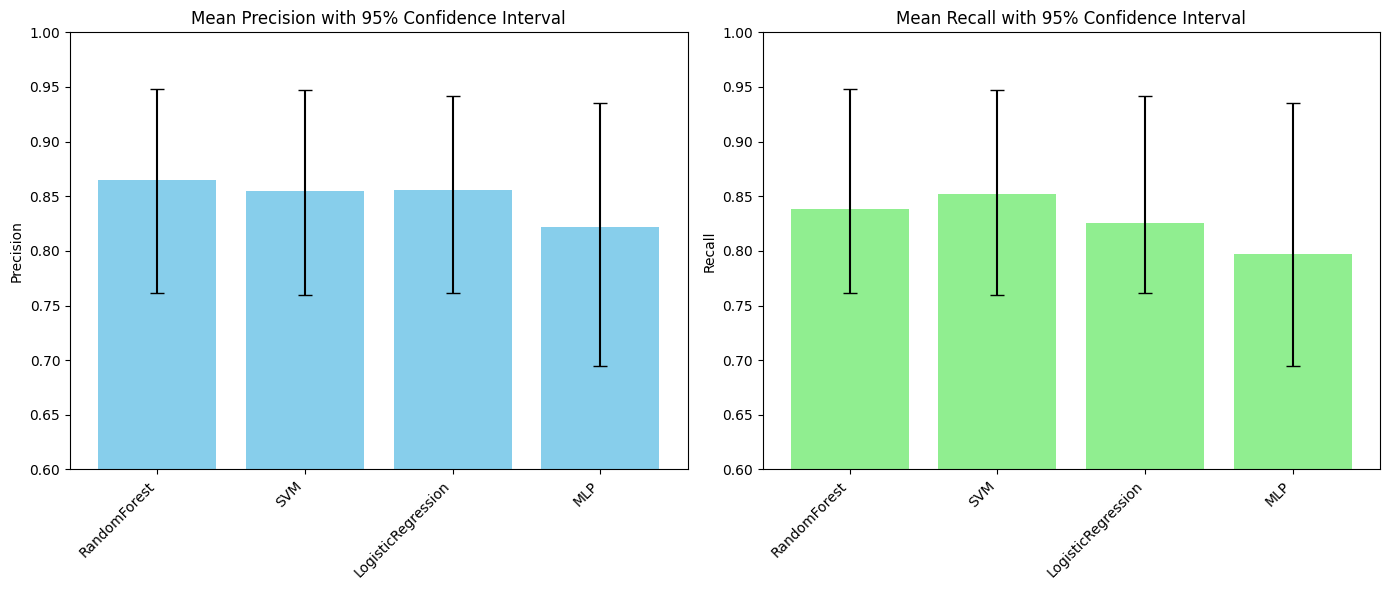

In [178]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot precision
ax[0].bar(models, mean_precisions, yerr=precision_errors, capsize=5, color='skyblue')
ax[0].set_title('Mean Precision with 95% Confidence Interval')
ax[0].set_ylabel('Precision')
ax[0].set_ylim([0.6, 1])
ax[0].set_xticklabels(models, rotation=45, ha="right")

# Plot recall
ax[1].bar(models, mean_recalls, yerr=recall_errors, capsize=5, color='lightgreen')
ax[1].set_title('Mean Recall with 95% Confidence Interval')
ax[1].set_ylabel('Recall')
ax[1].set_ylim([0.6, 1])
ax[1].set_xticklabels(models, rotation=45, ha="right")

plt.tight_layout()
plt.show()

## Second Machine

In [131]:
X_train, X_test, y_train, y_test = train_test_split(normal_counts.iloc[0:,1:].T, meta_data['Simplified_class'], test_size=0.3, random_state = 10101)

In [138]:
subset_data2 = pd.read_csv('subset_data2.csv')

In [139]:
subset_data2.head()

,Unnamed: 0,DLDR_0081,DLDR_0130,DLDR_0079,DLDR_0131,DLDR_0135,DLDR_0095,DLDR_0097,DLDR_0086,DLDR_0149,...,DLDR_0166,DLDR_0089,DLDR_0141,DLDR_0111,DLDR_0136,DLDR_0134,DLDR_0175,DLDR_0087,DLDR_0155,DLDR_0092
0,57,0.582165,-0.289488,-1.138550,-4.060128,-2.104255,0.018120,-0.056554,-1.903604,-1.742234,...,-1.954119,-0.631565,-4.286453,0.493507,-2.021838,-2.650924,-2.285986,-0.385647,-3.580073,0.317259
1,113,2.984263,2.373477,2.714901,2.882387,1.802635,2.119206,0.791442,1.924215,2.017503,...,2.204310,2.885011,1.494906,2.539800,1.740663,1.713649,2.728964,1.544451,1.603149,1.754123
2,173,0.944735,1.825990,1.234908,1.366137,1.188526,0.946567,-0.056554,2.041254,0.775615,...,1.896738,3.117374,0.237109,2.198764,0.215201,0.453413,1.338505,1.624068,0.943489,0.890444
3,209,7.001222,7.205796,6.750193,7.459017,7.379157,7.114793,7.020261,7.433126,7.577028,...,7.233940,7.386481,7.616299,6.879088,7.280747,7.098946,7.339114,7.366168,7.612425,7.340979
4,227,7.420468,7.808294,7.245547,7.685967,8.043204,7.850806,7.792694,8.012574,8.150516,...,7.846088,8.028629,8.260200,7.662124,7.703082,7.764607,7.869254,7.942482,7.955040,7.962346


In [140]:
subset_data2.shape

(500, 91)

In [141]:
meta_data2 = pd.read_csv('meta_data2.csv')

In [142]:
meta_data2.head()

,Unnamed: 0,Simplified_class
0,2,Advanced_fibrosis
1,5,Non_advanced_Fibrosis
2,7,Advanced_fibrosis
3,8,Non_advanced_Fibrosis
4,9,Non_advanced_Fibrosis


In [143]:
meta_data2.shape

(90, 2)

In [144]:
print(meta_data2['Simplified_class'].to_list().count("Advanced_fibrosis"))
print(meta_data2['Simplified_class'].to_list().count("Non_advanced_Fibrosis"))

52
38


In [145]:
selected_genes_R = subset_data2.T.iloc[0,:].to_list()

In [146]:
selected_genes_Python = [int(i-1) for i in selected_genes_R ]

In [147]:
selected_genes_Python[:10]

[56, 112, 172, 208, 226, 231, 234, 274, 296, 323]

In [148]:
len(selected_genes_Python)

500

In [149]:
X_test_reset = X_test.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)
X_not_normal = X_test_reset[y_test_reset != 'Normal']

In [150]:
df_deg = subset_data2.iloc[0:,1:].T
df_deg_test = X_not_normal[selected_genes_Python]

In [161]:
df_deg.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
DLDR_0081,0.582165,2.984263,0.944735,7.001222,7.420468,7.169273,6.471777,2.529697,7.759228,2.022737,...,1.681701,3.329399,2.418666,3.060212,0.944735,0.096738,5.105727,5.050934,1.234242,6.027475
DLDR_0130,-0.289488,2.373477,1.825990,7.205796,7.808294,6.998994,6.700278,1.467942,7.439405,0.527648,...,-0.158243,3.323819,3.231084,2.649112,0.527648,-1.511880,7.874940,5.652468,4.615111,6.297620
DLDR_0079,-1.138550,2.714901,1.234908,6.750193,7.245547,7.278919,6.219801,2.031375,7.481170,1.379298,...,1.705799,3.515760,2.435441,3.123117,0.045874,-0.074420,5.803964,5.151888,3.362020,7.124399
DLDR_0131,-4.060128,2.882387,1.366137,7.459017,7.685967,7.887874,6.871348,2.048397,7.556880,0.797853,...,2.089619,3.197260,3.079423,2.951099,0.027335,0.027335,8.942160,5.814853,4.403396,7.244223
DLDR_0135,-2.104255,1.802635,1.188526,7.379157,8.043204,7.723881,7.652968,0.528013,8.322219,1.000081,...,0.703100,2.112975,2.393996,2.974696,-1.618828,-1.256258,4.997983,5.337029,2.733688,5.035296


In [162]:
df_deg_test.head()

,56,112,172,208,226,231,234,274,296,323,...,16839,16862,16886,16891,17025,17062,17143,17179,17346,17377
3,0.143691,2.382763,2.201243,7.536608,8.052119,7.234358,7.097076,1.587791,7.489948,0.143691,...,0.825951,1.485611,2.862085,2.892352,-0.527686,-0.424592,8.082792,5.399544,5.013196,6.435531
4,-0.818750,2.172637,2.351175,7.204410,7.710216,7.358076,7.336550,1.530400,7.622416,1.055719,...,1.583349,3.308569,2.881690,2.101816,-0.166673,0.570292,7.629514,5.493701,4.645358,5.899416
8,-1.915401,1.343333,1.617094,7.450609,8.058809,7.759296,7.661758,1.207981,7.624035,1.207981,...,1.385769,2.219759,3.271598,2.515649,0.032132,-1.022316,7.834469,5.358062,5.176601,6.270890
9,-1.186693,2.679121,2.366279,7.145402,7.897555,7.330458,6.892651,2.016590,7.451647,0.293300,...,0.832166,1.878262,3.227157,3.100654,-0.225168,-2.264696,7.040859,5.563264,3.077132,5.732170
11,-0.769585,2.523197,1.917476,7.572934,8.090757,7.672861,7.619810,1.380975,7.784851,0.012824,...,0.961598,0.890340,3.114036,1.970263,-0.459245,0.078412,8.030927,5.970803,5.178081,6.131041


In [153]:
y_train2 = y_train[y_train != 'Normal']
y_test2 = y_test[y_test != 'Normal']

In [154]:
# Logistic Regression
LR_model = LogisticRegression(solver='saga')
LR_model.fit(df_deg, y_train2)

y_pred_LR = LR_model.predict(df_deg_test)
LR_precision = precision_score(y_test2, y_pred_LR, average='macro')
LR_recall = recall_score(y_test2, y_pred_LR, average='macro')
print(LR_precision)
print(LR_recall)

0.8928571428571428
0.8948717948717949


In [155]:
# Support Vector Machine
SVM_model = SVC(kernel='linear', C=1)
SVM_model.fit(df_deg, y_train2)

y_pred_SVM = SVM_model.predict(df_deg_test)
SVM_precision = precision_score(y_test2, y_pred_SVM, average='macro')
SVM_recall = recall_score(y_test2, y_pred_SVM, average='macro')
print(SVM_precision)
print(SVM_recall)

0.8333333333333333
0.8282051282051281


In [156]:
# Random Forest
RF_model = RandomForestClassifier()
RF_model.fit(df_deg, y_train2)

y_pred_RF = RF_model.predict(df_deg_test)
RF_precision = precision_score(y_test2, y_pred_RF, average='macro')
RF_recall = recall_score(y_test2, y_pred_RF, average='macro')
print(RF_precision)
print(RF_recall)

0.8615384615384616
0.8615384615384616


In [157]:
# Multi Layer Perceptron
MLP_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam')
MLP_model.fit(df_deg, y_train2)

y_pred_MLP = MLP_model.predict(df_deg_test)
MLP_precision = precision_score(y_test2, y_pred_MLP, average='macro')
MLP_recall = recall_score(y_test2, y_pred_MLP, average='macro')
print(MLP_precision)
print(MLP_recall)

0.8333333333333333
0.8282051282051281


In [179]:
import subprocess

# Load Data
normal_counts = pd.read_csv('Normal.counts.voom.csv')
meta_data = pd.read_csv('meta_data.csv')

n_iterations = 300
test_size = 0.3

LR_precisions = []
LR_recalls = []

SVM_precisions = []
SVM_recalls = []

RF_precisions = []
RF_recalls = []

MLP_precisions = []
MLP_recalls = []

for i in range(100):
    print('iteration',i)
    X_train, X_test, y_train, y_test = train_test_split(normal_counts.iloc[0:,1:].T, meta_data['Simplified_class'], test_size=0.3, random_state = i)
    X_train.T.to_csv('train_normal_counts.csv', index=False)
    y_train.T.to_csv('train_meta_data.csv', index=False)

    r_script_path = r"q3r2.R"
    rscript_path = r"C:\Program Files\R\R-4.2.1\bin\Rscript.exe"
    # Execute the R script
    try:
    	subprocess.run([rscript_path, r_script_path], capture_output=True, text=True)
    except subprocess.CalledProcessError as e:
    	print(f"Error executing R script: {e}")

    #
    subset_data2 = pd.read_csv('subset_data2.csv')
    selected_genes_R = subset_data2.T.iloc[0,:].to_list()
    selected_genes_Python = [int(i-1) for i in selected_genes_R ]

    X_test_reset = X_test.reset_index(drop=True)
    y_test_reset = y_test.reset_index(drop=True)
    X_not_normal = X_test_reset[y_test_reset != 'Normal']

    df_deg = subset_data2.iloc[0:,1:].T
    df_deg_test = X_not_normal[selected_genes_Python]

    y_train2 = y_train[y_train != 'Normal']
    y_test2 = y_test[y_test != 'Normal']
    

    # Logistic Regression
    LR_model = LogisticRegression(solver='saga')
    LR_model.fit(df_deg, y_train2)
    y_pred_LR = LR_model.predict(df_deg_test)
    LR_precision = precision_score(y_test2, y_pred_LR, average='macro')
    LR_recall = recall_score(y_test2, y_pred_LR, average='macro')
    LR_precisions.append(LR_precision)
    LR_recalls.append(LR_recall)

    # Support Vector Machine
    SVM_model = SVC(kernel='linear', C=1)
    SVM_model.fit(df_deg, y_train2)
    y_pred_SVM = SVM_model.predict(df_deg_test)
    SVM_precision = precision_score(y_test2, y_pred_SVM, average='macro')
    SVM_recall = recall_score(y_test2, y_pred_SVM, average='macro')
    SVM_precisions.append(SVM_precision)
    SVM_recalls.append(SVM_recall)

    # Random Forest
    RF_model = RandomForestClassifier()
    RF_model.fit(df_deg, y_train2)
    y_pred_RF = RF_model.predict(df_deg_test)
    RF_precision = precision_score(y_test2, y_pred_RF, average='macro')
    RF_recall = recall_score(y_test2, y_pred_RF, average='macro')
    RF_precisions.append(RF_precision)
    RF_recalls.append(RF_recall)

    # Multi Layer Perceptron
    MLP_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam')
    MLP_model.fit(df_deg, y_train2)
    y_pred_MLP = MLP_model.predict(df_deg_test)
    MLP_precision = precision_score(y_test2, y_pred_MLP, average='macro')
    MLP_recall = recall_score(y_test2, y_pred_MLP, average='macro')
    MLP_precisions.append(MLP_precision)
    MLP_recalls.append(MLP_recall)

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration

In [180]:
LR_mean_precision = np.mean(LR_precisions)
LR_mean_recall = np.mean(LR_recalls)
LR_precision_conf_interval = np.percentile(LR_precisions, [2.5, 97.5])
LR_recall_conf_interval = np.percentile(LR_recalls, [2.5, 97.5])
print(f'Mean Precision for Logistic Regression: {LR_mean_precision}, 95% CI: {LR_precision_conf_interval}')
print(f'Mean Recall for Logistic Regression: {LR_mean_recall}, 95% CI: {LR_recall_conf_interval}')
print("-------------------------------------------------------------------------------------------------")

SVM_mean_precision = np.mean(SVM_precisions)
SVM_mean_recall = np.mean(SVM_recalls)
SVM_precision_conf_interval = np.percentile(SVM_precisions, [2.5, 97.5])
SVM_recall_conf_interval = np.percentile(SVM_recalls, [2.5, 97.5])
print(f'Mean Precision for Support Vector Machine: {SVM_mean_precision}, 95% CI: {SVM_precision_conf_interval}')
print(f'Mean Recall for Support Vector Machine: {SVM_mean_recall}, 95% CI: {SVM_recall_conf_interval}')
print("-------------------------------------------------------------------------------------------------")

RF_mean_precision = np.mean(RF_precisions)
RF_mean_recall = np.mean(RF_recalls)
RF_precision_conf_interval = np.percentile(RF_precisions, [2.5, 97.5])
RF_recall_conf_interval = np.percentile(RF_recalls, [2.5, 97.5])
print(f'Mean Precision for Random Forest: {RF_mean_precision}, 95% CI: {RF_precision_conf_interval}')
print(f'Mean Recall for Random Forest: {RF_mean_recall}, 95% CI: {RF_recall_conf_interval}')
print("-------------------------------------------------------------------------------------------------")

MLP_mean_precision = np.mean(MLP_precisions)
MLP_mean_recall = np.mean(MLP_recalls)
MLP_precision_conf_interval = np.percentile(MLP_precisions, [2.5, 97.5])
MLP_recall_conf_interval = np.percentile(MLP_recalls, [2.5, 97.5])
print(f'Mean Precision for Multi Layer Perceptron: {MLP_mean_precision}, 95% CI: {MLP_precision_conf_interval}')
print(f'Mean Recall for Multi Layer Perceptron: {MLP_mean_recall}, 95% CI: {MLP_recall_conf_interval}')

Mean Precision for Logistic Regression: 0.8554695211191643, 95% CI: [0.71069293 0.96791498]
Mean Recall for Logistic Regression: 0.8515770304901497, 95% CI: [0.71260016 0.97035088]
-------------------------------------------------------------------------------------------------
Mean Precision for Support Vector Machine: 0.8663481316042159, 95% CI: [0.75703125 0.95239583]
Mean Recall for Support Vector Machine: 0.866406451707384, 95% CI: [0.76103547 0.96390665]
-------------------------------------------------------------------------------------------------
Mean Precision for Random Forest: 0.8578727776657291, 95% CI: [0.73331731 0.97134046]
Mean Recall for Random Forest: 0.8517229669980041, 95% CI: [0.71544036 0.97104167]
-------------------------------------------------------------------------------------------------
Mean Precision for Multi Layer Perceptron: 0.863588846226723, 95% CI: [0.70527936 0.96662946]
Mean Recall for Multi Layer Perceptron: 0.8625670393567486, 95% CI: [0.70028

In [181]:
model_results = {
    'RandomForest': {
        'mean_precision': RF_mean_precision,
        'precision_ci': RF_precision_conf_interval,
        'mean_recall': RF_mean_recall,
        'recall_ci': RF_precision_conf_interval
    },
    'SVM': {
        'mean_precision': SVM_mean_precision,
        'precision_ci': SVM_precision_conf_interval,
        'mean_recall': SVM_mean_recall,
        'recall_ci': SVM_precision_conf_interval
    },
        'LogisticRegression': {
        'mean_precision': LR_mean_precision,
        'precision_ci': LR_precision_conf_interval,
        'mean_recall': LR_mean_recall,
        'recall_ci': LR_precision_conf_interval
    },
    'MLP': {
        'mean_precision': MLP_mean_precision,
        'precision_ci': MLP_precision_conf_interval,
        'mean_recall': MLP_mean_recall,
        'recall_ci': MLP_precision_conf_interval
    }
}

In [182]:
models = list(model_results.keys())
mean_precisions = [model_results[model]['mean_precision'] for model in models]
precision_cis = [model_results[model]['precision_ci'] for model in models]
mean_recalls = [model_results[model]['mean_recall'] for model in models]
recall_cis = [model_results[model]['recall_ci'] for model in models]
precision_errors = np.array([[mean - ci[0], ci[1] - mean] for mean, ci in zip(mean_precisions, precision_cis)]).T
recall_errors = np.array([[mean - ci[0], ci[1] - mean] for mean, ci in zip(mean_recalls, recall_cis)]).T

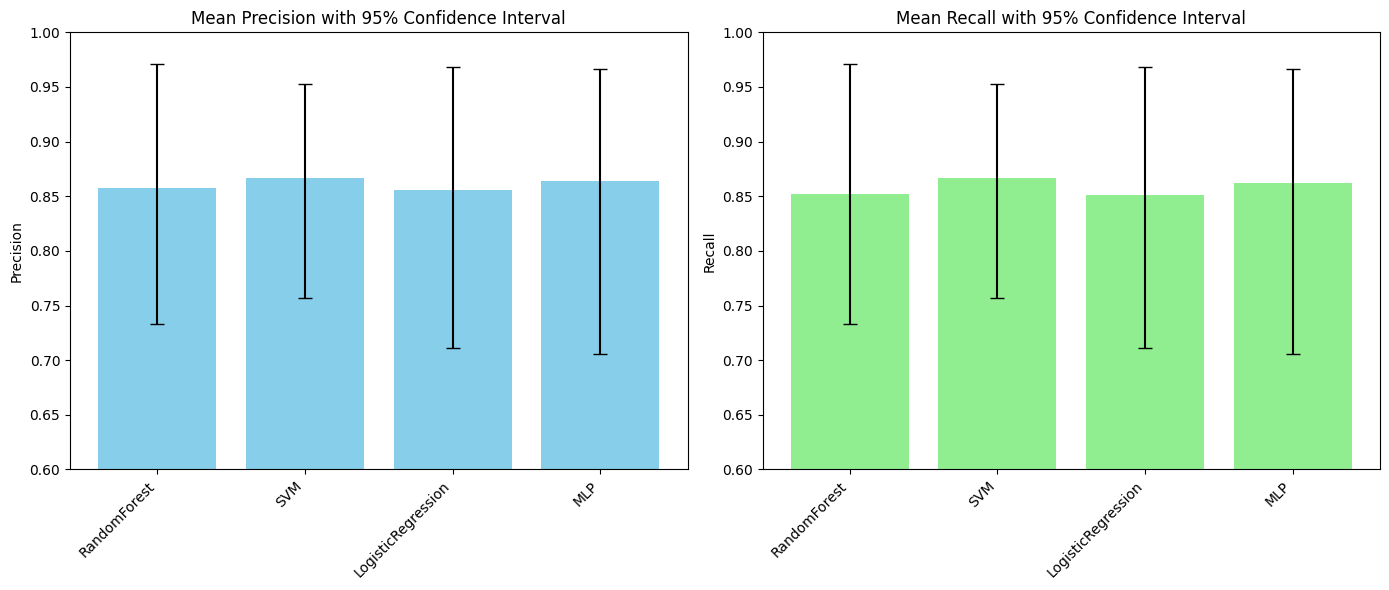

In [183]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot precision
ax[0].bar(models, mean_precisions, yerr=precision_errors, capsize=5, color='skyblue')
ax[0].set_title('Mean Precision with 95% Confidence Interval')
ax[0].set_ylabel('Precision')
ax[0].set_ylim([0.6, 1])
ax[0].set_xticklabels(models, rotation=45, ha="right")

# Plot recall
ax[1].bar(models, mean_recalls, yerr=recall_errors, capsize=5, color='lightgreen')
ax[1].set_title('Mean Recall with 95% Confidence Interval')
ax[1].set_ylabel('Recall')
ax[1].set_ylim([0.6, 1])
ax[1].set_xticklabels(models, rotation=45, ha="right")

plt.tight_layout()
plt.show()